# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)
X = X.to_numpy()
type(X)

numpy.ndarray

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

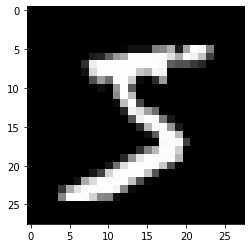

In [5]:
img=X[0].reshape(28,28)
plt.imshow(img, cmap="gray")

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [6]:
class_names = ['0','1','2','3','4','5','6','7','8','9']
n_classes = len(class_names)

### Naive Bayes

accuracy GaussianNB: 0.5571666666666667


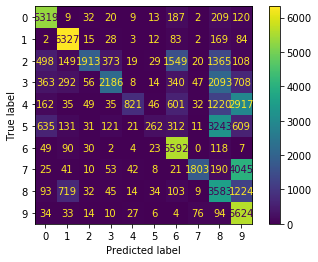

Wall time: 13.4 s


In [7]:
%%time
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
y_pred = clf_NB.predict(X_train)
print("accuracy GaussianNB:", accuracy_score(y_train, y_pred))
plot_confusion_matrix(clf_NB, X_train, y_train)  
plt.show()  

### Simple linar model

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


accuracy Simple linar model: 0.8633166666666666


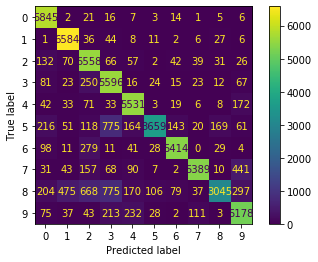

Wall time: 13.2 s


In [8]:
%%time
from sklearn.linear_model import SGDClassifier
clf_SL = SGDClassifier(max_iter = 10, loss='log')
clf_SL.fit(X_train, y_train)
y_pred = clf_SL.predict(X_train)
print('accuracy Simple linar model:', accuracy_score(y_train, y_pred))
#confusion_matrix(y_train, y_pred)
plot_confusion_matrix(clf_SL, X_train, y_train)  
plt.show()  

### Random Forest

accuracy Random Forest: 0.96465


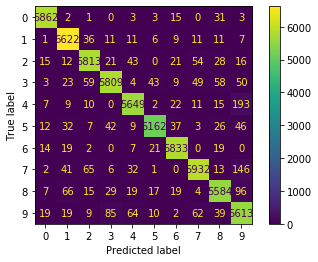

Wall time: 50 s


In [9]:
%%time
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(max_depth=10, random_state=0)
clf_RF.fit(X_train, y_train)
y_pred = clf_RF.predict(X_train)
print('accuracy Random Forest:', accuracy_score(y_train, y_pred))
#confusion_matrix(y_train, y_pred)
plot_confusion_matrix(clf_RF, X_train, y_train)  
plt.show()  

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [10]:
y5 = y_test=='5'

### Naive Bayes

accuracy GaussianNB: 0.5604
f1-score GaussianNB: 0.5092207842748325


Text(0.5, 1.0, 'Naive Bayes')

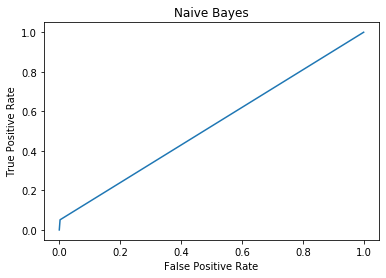

In [11]:
y_pred = clf_NB.predict(X_test)
y_pred_5 = clf_NB.predict(X_test).astype(int)==5
fpr_NB, tpr_NB, threshold_NB = roc_curve(y5, y_pred_5)

print("accuracy GaussianNB:", accuracy_score(y_test, y_pred))
print("f1-score GaussianNB:", f1_score(y_test, y_pred, average='macro'))

roc_display = RocCurveDisplay(fpr=fpr_NB, tpr=tpr_NB).plot()
plt.title('Naive Bayes')

### Simple linar model

accuracy Simple linar model: 0.8532
f1-score Simple linar model: 0.8465512554876543


Text(0.5, 1.0, 'Simple linear model')

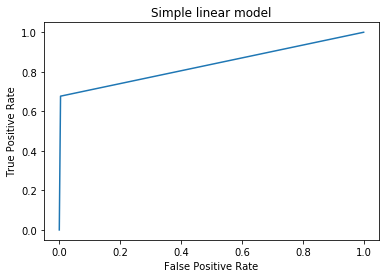

In [12]:
y_pred = clf_SL.predict(X_test)
y_pred_5 = clf_SL.predict(X_test).astype(int)==5
fpr_Slm, tpr_Slm, threshold_Slm = roc_curve(y5, y_pred_5)

print('accuracy Simple linar model:', accuracy_score(y_test, y_pred))
print('f1-score Simple linar model:', f1_score(y_test, y_pred, average='macro'))

roc_display = RocCurveDisplay(fpr=fpr_Slm, tpr=tpr_Slm).plot()
plt.title('Simple linear model')

### Random Forest

accuracy Random Forest: 0.9438
f1-score Random Forest: 0.9435695349829043


Text(0.5, 1.0, 'Random Forest')

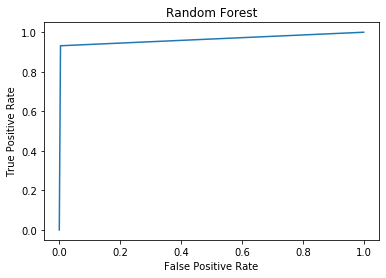

In [13]:
y_pred = clf_RF.predict(X_test)
y_pred_5 = clf_RF.predict(X_test).astype(int)==5
fpr_RF, tpr_RF, threshold_RF = roc_curve(y5, y_pred_5)

print('accuracy Random Forest:', accuracy_score(y_test, y_pred))
print('f1-score Random Forest:', f1_score(y_test, y_pred, average='macro'))

roc_display = RocCurveDisplay(fpr=fpr_RF, tpr=tpr_RF).plot()
plt.title('Random Forest')